In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error



drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import datetime as dt
from datetime import datetime

In [5]:
df = pd.read_csv('/content/drive/MyDrive/NBA_Models/lakers_augmented_data_{timestamp}.csv'.format(timestamp=datetime.now().strftime('%m-%d-%Y')), index_col=0)

In [6]:
df

,Unnamed: 0,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,PF,PTS,GmSc,+/-,Game,Home,Final_Score_Delta,PERSON_ID,TEAM_ID,Played
0,0,00:37:35,11.0,23.0,0.478,1.0,3.0,0.333,13.0,15.0,...,1.0,36.0,34.0,1.0,1,0,7,203076,1610612750,1
1,1,00:36:02,6.0,14.0,0.429,0.0,5.0,0.000,0.0,1.0,...,4.0,12.0,11.4,12.0,1,0,7,1630559,1610612750,1
2,2,00:35:05,7.0,14.0,0.500,1.0,4.0,0.250,3.0,4.0,...,2.0,18.0,15.9,19.0,1,0,7,1629060,1610612750,1
3,3,00:34:39,7.0,16.0,0.438,1.0,4.0,0.250,1.0,1.0,...,3.0,16.0,10.1,-6.0,1,0,7,2544,1610612750,1
4,4,00:34:13,4.0,12.0,0.333,1.0,7.0,0.143,0.0,0.0,...,2.0,9.0,6.2,15.0,1,0,7,1626156,1610612750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,00:13:29,0.0,3.0,0.000,0.0,2.0,0.000,2.0,2.0,...,1.0,2.0,3.2,1.0,34,0,-4,1629003,1610612737,1
391,391,00:12:50,1.0,2.0,0.500,1.0,2.0,0.500,0.0,0.0,...,1.0,3.0,3.0,1.0,34,0,-4,1629629,1610612737,1
392,392,00:10:42,1.0,2.0,0.500,0.0,0.0,NaN,1.0,2.0,...,0.0,3.0,1.9,0.0,34,0,-4,1629637,1610612737,1
393,393,00:01:41,0.0,1.0,0.000,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,2.0,34,0,-4,1642355,1610612737,1


In [7]:
df['MP'] = df['MP'].fillna(pd.to_datetime('00:00:00').time())
df.fillna(0, inplace=True)

In [8]:
df

,Unnamed: 0,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,PF,PTS,GmSc,+/-,Game,Home,Final_Score_Delta,PERSON_ID,TEAM_ID,Played
0,0,00:37:35,11.0,23.0,0.478,1.0,3.0,0.333,13.0,15.0,...,1.0,36.0,34.0,1.0,1,0,7,203076,1610612750,1
1,1,00:36:02,6.0,14.0,0.429,0.0,5.0,0.000,0.0,1.0,...,4.0,12.0,11.4,12.0,1,0,7,1630559,1610612750,1
2,2,00:35:05,7.0,14.0,0.500,1.0,4.0,0.250,3.0,4.0,...,2.0,18.0,15.9,19.0,1,0,7,1629060,1610612750,1
3,3,00:34:39,7.0,16.0,0.438,1.0,4.0,0.250,1.0,1.0,...,3.0,16.0,10.1,-6.0,1,0,7,2544,1610612750,1
4,4,00:34:13,4.0,12.0,0.333,1.0,7.0,0.143,0.0,0.0,...,2.0,9.0,6.2,15.0,1,0,7,1626156,1610612750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,00:13:29,0.0,3.0,0.000,0.0,2.0,0.000,2.0,2.0,...,1.0,2.0,3.2,1.0,34,0,-4,1629003,1610612737,1
391,391,00:12:50,1.0,2.0,0.500,1.0,2.0,0.500,0.0,0.0,...,1.0,3.0,3.0,1.0,34,0,-4,1629629,1610612737,1
392,392,00:10:42,1.0,2.0,0.500,0.0,0.0,0.000,1.0,2.0,...,0.0,3.0,1.9,0.0,34,0,-4,1629637,1610612737,1
393,393,00:01:41,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,2.0,34,0,-4,1642355,1610612737,1


In [9]:
y = df[['Game', 'Final_Score_Delta']].set_index('Game').groupby('Game').agg('max')

unflatten_X = pd.get_dummies(df[['PERSON_ID', 'TEAM_ID']].astype(str)) # Use double square brackets to select multiple columns
unflatten_X['MP'] = df['MP'].apply(lambda x: pd.to_datetime(str(x)).time())
unflatten_X['Home'] = df['Home']
unflatten_X['Game'] = df['Game']

In [10]:
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home,Game
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:37:35,0,1
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,00:36:02,0,1
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,00:35:05,0,1
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:34:39,0,1
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:34:13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:13:29,0,34
391,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,00:12:50,0,34
392,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,00:10:42,0,34
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,00:01:41,0,34


In [11]:
y

,Final_Score_Delta
Game,
1,7
2,4
3,-4
4,-24
5,6
6,-12
7,-17
8,10
9,20


In [12]:
unflatten_X['MP'] = unflatten_X['MP'].apply(lambda x: (x.hour * 60 + x.minute * 60 + x.second) if isinstance(x, dt.time) else x)

# Ensure all columns in X and y are numeric
unflatten_X = unflatten_X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)  # Convert to numeric, fill NaNs with 0
unflatten_X['Game'] = unflatten_X['Game'].astype(int)  # Convert to numeric, fill NaNs with 0

In [13]:
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home,Game
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2105.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2079.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0,34
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,0.0,34
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0,34
393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,34




```
interacting_variables = pd.DataFrame()
interacting_variables['MPxPTSxFinalScorexPlayed'] = y['MP'] * y['PTS']*y['TRB']
interacting_variables['MPxPTSxTRBxAST'] = y['MP'] * y['PTS']*y['TRB']*y['AST']
interacting_variables['PTSxBLKxFinalScore'] = y['MP'] * y['PTS']*y['BLK']*y['Final_Score_Delta']
interacting_variables['TRBxASTxFinalScore'] = y['MP'] * y['TRB']*y['AST']*y['Final_Score_Delta']
interacting_variables['HomexFinalScore'] = y['MP'] * y['TRB']*y['BLK']*y['Final_Score_Delta']


lags = 1  # Define the number of lags

for col in interacting_variables.columns:
    for i in range(1, lags + 1):
        interacting_variables[f'{col}_lag_{i}'] = interacting_variables[col].shift(i)


# Add lagged interacting variables to X
for col in interacting_variables.columns:
    for i in range(1, lags + 1):
        if f'{col}_lag_{i}' in interacting_variables:
            X[f'{col}_lag_{i}'] = interacting_variables[f'{col}_lag_{i}']
```



In [14]:
unflatten_X.set_index('Game', inplace=True)
unflatten_X

,PERSON_ID_1626156,PERSON_ID_1626174,PERSON_ID_1627827,PERSON_ID_1629003,PERSON_ID_1629020,PERSON_ID_1629060,PERSON_ID_1629216,PERSON_ID_1629629,PERSON_ID_1629637,PERSON_ID_1630559,...,TEAM_ID_1610612757,TEAM_ID_1610612758,TEAM_ID_1610612759,TEAM_ID_1610612760,TEAM_ID_1610612761,TEAM_ID_1610612762,TEAM_ID_1610612763,TEAM_ID_1610612765,MP,Home
Game,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2162.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2105.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2079.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2053.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,809.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.0,0.0


In [15]:
player_columns = [col for col in unflatten_X.columns if 'PERSON_ID' in col]
X = pd.DataFrame()

for col in player_columns:
    new_col_name = col.replace('PERSON_ID_', 'MP_PLAYER_')
    X[new_col_name] = unflatten_X[col] * unflatten_X['MP']

X = X.groupby('Game').sum()
X

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,MP_PLAYER_1631108,MP_PLAYER_1631132,MP_PLAYER_1641720,MP_PLAYER_1641721,MP_PLAYER_1642261,MP_PLAYER_1642355,MP_PLAYER_1642439,MP_PLAYER_203076,MP_PLAYER_2544
Game,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,685.0,0.0,0.0,0.0,947.0,161.0,0.0,2255.0,2079.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,685.0,0.0,0.0,0.0,799.0,0.0,0.0,2250.0,2082.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,1074.0,0.0,0.0,0.0,1210.0,0.0,0.0,2265.0,2026.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,1390.0,0.0,0.0,0.0,674.0,0.0,0.0,2130.0,2148.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,1636.0,0.0,0.0,0.0,1349.0,316.0,0.0,1880.0,1738.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,795.0,0.0,0.0,0.0,1147.0,7.0,0.0,2143.0,2175.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,252.0,0.0,0.0,0.0,521.0,0.0,0.0,2340.0,2400.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,1162.0,800.0,0.0,0.0,1612.0,275.0,0.0,0.0,2125.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,88.0,88.0,88.0,88.0,970.0,88.0,0.0,2129.0,2028.0


In [16]:
remaining_columns = [col for col in unflatten_X.columns if 'TEAM_ID' in col or 'Home' in col]

X=X.join(unflatten_X[remaining_columns].drop_duplicates(), on='Game').rename(columns={col: col.replace('TEAM_ID_', 'TEAM_') for col in remaining_columns})

team_columns = [col for col in X.columns if 'TEAM_' in col]


for col in team_columns:
    new_col_name = col.replace('TEAM_', 'HomexTEAM_')
    X[new_col_name] = X[col] * X['Home']

X

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X.columns

Index(['MP_PLAYER_1626156', 'MP_PLAYER_1626174', 'MP_PLAYER_1627827',
       'MP_PLAYER_1629003', 'MP_PLAYER_1629020', 'MP_PLAYER_1629060',
       'MP_PLAYER_1629216', 'MP_PLAYER_1629629', 'MP_PLAYER_1629637',
       'MP_PLAYER_1630559', 'MP_PLAYER_1631108', 'MP_PLAYER_1631132',
       'MP_PLAYER_1641720', 'MP_PLAYER_1641721', 'MP_PLAYER_1642261',
       'MP_PLAYER_1642355', 'MP_PLAYER_1642439', 'MP_PLAYER_203076',
       'MP_PLAYER_2544', 'TEAM_1610612737', 'TEAM_1610612739',
       'TEAM_1610612740', 'TEAM_1610612743', 'TEAM_1610612744',
       'TEAM_1610612748', 'TEAM_1610612750', 'TEAM_1610612753',
       'TEAM_1610612755', 'TEAM_1610612756', 'TEAM_1610612757',
       'TEAM_1610612758', 'TEAM_1610612759', 'TEAM_1610612760',
       'TEAM_1610612761', 'TEAM_1610612762', 'TEAM_1610612763',
       'TEAM_1610612765', 'Home', 'HomexTEAM_1610612737',
       'HomexTEAM_1610612739', 'HomexTEAM_1610612740', 'HomexTEAM_1610612743',
       'HomexTEAM_1610612744', 'HomexTEAM_1610612748', 'Homex

In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Final_Score_Delta  34 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


In [19]:
y

,Final_Score_Delta
Game,
1,7
2,4
3,-4
4,-24
5,6
6,-12
7,-17
8,10
9,20


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1 to 34
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MP_PLAYER_1626156     34 non-null     float64
 1   MP_PLAYER_1626174     34 non-null     float64
 2   MP_PLAYER_1627827     34 non-null     float64
 3   MP_PLAYER_1629003     34 non-null     float64
 4   MP_PLAYER_1629020     34 non-null     float64
 5   MP_PLAYER_1629060     34 non-null     float64
 6   MP_PLAYER_1629216     34 non-null     float64
 7   MP_PLAYER_1629629     34 non-null     float64
 8   MP_PLAYER_1629637     34 non-null     float64
 9   MP_PLAYER_1630559     34 non-null     float64
 10  MP_PLAYER_1631108     34 non-null     float64
 11  MP_PLAYER_1631132     34 non-null     float64
 12  MP_PLAYER_1641720     34 non-null     float64
 13  MP_PLAYER_1641721     34 non-null     float64
 14  MP_PLAYER_1642261     34 non-null     float64
 15  MP_PLAYER_1642355     34 non-n

In [21]:
X.fillna(0, inplace=True)
X[:24]

,MP_PLAYER_1626156,MP_PLAYER_1626174,MP_PLAYER_1627827,MP_PLAYER_1629003,MP_PLAYER_1629020,MP_PLAYER_1629060,MP_PLAYER_1629216,MP_PLAYER_1629629,MP_PLAYER_1629637,MP_PLAYER_1630559,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2053.0,0.0,0.0,0.0,0.0,2105.0,1033.0,0.0,920.0,2162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1757.0,0.0,0.0,0.0,0.0,2341.0,1235.0,0.0,1052.0,2199.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1948.0,0.0,0.0,0.0,0.0,2240.0,757.0,0.0,868.0,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1999.0,0.0,0.0,0.0,0.0,1881.0,1157.0,0.0,750.0,2271.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1448.0,0.0,0.0,0.0,0.0,1697.0,969.0,553.0,1144.0,1670.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1948.0,0.0,0.0,0.0,0.0,1993.0,1232.0,0.0,902.0,2058.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1982.0,0.0,0.0,0.0,0.0,2086.0,1066.0,841.0,551.0,2361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1293.0,0.0,0.0,0.0,0.0,0.0,1401.0,1556.0,2080.0,2096.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1524.0,0.0,0.0,0.0,0.0,1970.0,940.0,1669.0,934.0,1796.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
train_size = int(len(y) * 0.8)  # 80% for training
train_y, test_y = y[:train_size], y[train_size:]
train_X, test_X = X[:train_size], X[train_size:]

# Fit the model on the training data
model = ARIMA(train_y, exog=train_X, order=(1, 0, 0))  # Adjust order if needed
results = model.fit()

# Forecast on the test data
forecast_steps = len(test_y)
predictions = results.get_forecast(steps=forecast_steps, exog=test_X)
predicted_mean = predictions.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [24]:
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Final_Score_Delta   No. Observations:                   27
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 286.029
Date:                Wed, 08 Jan 2025   AIC                           -454.057
Time:                        00:08:45   BIC                           -377.603
Sample:                             0   HQIC                          -431.324
                                 - 27                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2070   1.69e-06   1.23e+05      0.000       0.207       0.207
MP_PLAYER_1626156       -0.0067      0.002     -2.770      0.006      -0.011      -0.002
MP_PLAYER_1626174     1.974e-12         -0       -inf      0.000    1.97e-12    1.97e-12
MP_PLAYER_1627827    -2.696e-14         -0        inf      0.000    -2.7e-14    -2.7e-14
MP_PLAYER_1629003    -6.005e-13         -0        inf      0.000      -6e-13      -6e-13
MP_PLAYER_1629020    -4.426e-13         -0        inf      0.000   -4.43e-13   -4.43e-13
MP_PLAYER_1629060        0.0007      0.004      0.198      0.843      -0.006       0.008
MP_PLAYER_1629216       -0.0076      0.002     -3.737      0.000      -0.012      -0.004
MP_PLAYER_1629629        0.0081      0.001      6.108      0.000       0.005       0.011
MP_PLAYER_1629637        0.0143      0.000     42.532      0.000       0.014       0.015
MP_PLAYER_1630559       -0.0091      0.003     -3.152      0.002      -0.015      -0.003
MP_PLAYER_1631108        0.0005      0.002      0.243      0.808      -0.004       0.005
MP_PLAYER_1631132        0.0121      0.000     48.340      0.000       0.012       0.013
MP_PLAYER_1641720       -0.0552        nan        nan        nan         nan         nan
MP_PLAYER_1641721       -0.0677        nan        nan        nan         nan         nan
MP_PLAYER_1642261       -0.0106      0.002     -4.955      0.000      -0.015      -0.006
MP_PLAYER_1642355        0.0277        nan        nan        nan         nan         nan
MP_PLAYER_1642439       -0.0376        nan        nan        nan         nan         nan
MP_PLAYER_203076         0.0140      0.004      3.719      0.000       0.007       0.021
MP_PLAYER_2544           0.0038      0.004      1.015      0.310      -0.004       0.011
TEAM_1610612737         -1.2568    2.5e-07  -5.03e+06      0.000      -1.257      -1.257
TEAM_1610612739         -3.9788        nan        nan        nan         nan         nan
TEAM_1610612740         12.9337   2.06e-10   6.27e+10      0.000      12.934      12.934
TEAM_1610612743        -16.7854   1.43e-09  -1.17e+10      0.000     -16.785     -16.785
TEAM_1610612744       3.397e-15         -0       -inf      0.000     3.4e-15     3.4e-15
TEAM_1610612748         11.6372    2.3e-08   5.06e+08      0.000      11.637      11.637
TEAM_1610612750         -0.7879   9.21e-09  -8.55e+07      0.000      -0.788      -0.788
TEAM_1610612753        -24.9829        nan        nan        nan         nan         nan
TEAM_1610612755          5.2845   1.51e-08    3.5e+08      0.000       5.284       5.284
TEAM_1610612756         -3.0107   1.94e-07  -1.55e+07      0.000      -3.011      -3.011
TEAM_1610612757      -7.641e-05        nan        nan        nan         nan         nan
TEAM_1610612758         -8.2060   4.14e-07  -1.98e+07      0.000      -8.206      -8.206
TEAM_1610612759          3.9004   8.48e-09    4.6e+08      0.000       3.900       3.900
TEAM_1610612760          7.0050   3.1

Mean Squared Error: 298.36892081983143


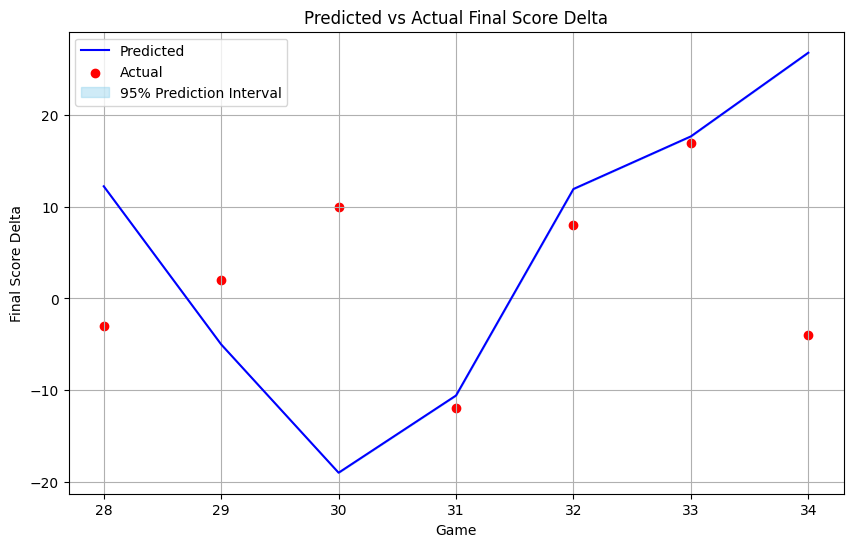

In [25]:
# prompt: create a scatter plot of predicted vs actual values. Let the predicted values be a line and the actual values a dot. Include a prediction interval band

import matplotlib.pyplot as plt

# Get the confidence intervals
confidence_intervals = predictions.conf_int()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, predicted_mean, label='Predicted', color='blue')
plt.scatter(test_y.index, test_y['Final_Score_Delta'], label='Actual', color='red', marker='o')

# Fill the prediction interval band
plt.fill_between(test_y.index, confidence_intervals['lower Final_Score_Delta'], confidence_intervals['upper Final_Score_Delta'], color='skyblue', alpha=0.4, label='95% Prediction Interval')

mse = mean_squared_error(test_y, predicted_mean)
print(f"Mean Squared Error: {mse}")

plt.xlabel('Game')
plt.ylabel('Final Score Delta')
plt.title('Predicted vs Actual Final Score Delta')
plt.legend()
plt.grid(True)
plt.show()

# All stars only

In [26]:
mp_player_cols = [col for col in X.columns if 'MP_PLAYER_' in col]
cols_to_keep = ['MP_PLAYER_2544', 'MP_PLAYER_203076']

# Filter the columns
cols_to_remove = [col for col in mp_player_cols if col not in cols_to_keep]

train_X, test_X = X[:train_size].drop(columns=cols_to_remove), X[train_size:].drop(columns=cols_to_remove)


In [27]:
train_X

,MP_PLAYER_203076,MP_PLAYER_2544,TEAM_1610612737,TEAM_1610612739,TEAM_1610612740,TEAM_1610612743,TEAM_1610612744,TEAM_1610612748,TEAM_1610612750,TEAM_1610612753,...,HomexTEAM_1610612755,HomexTEAM_1610612756,HomexTEAM_1610612757,HomexTEAM_1610612758,HomexTEAM_1610612759,HomexTEAM_1610612760,HomexTEAM_1610612761,HomexTEAM_1610612762,HomexTEAM_1610612763,HomexTEAM_1610612765
Game,,,,,,,,,,,,,,,,,,,,,
1,2255.0,2079.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2250.0,2082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2265.0,2026.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2130.0,2148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1880.0,1738.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2143.0,2175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2340.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,2125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2129.0,2028.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
model = ARIMA(train_y, exog=train_X, order=(1, 0, 0))  # Adjust order if needed
results = model.fit()

forecast_steps = len(test_y)
predictions = results.get_forecast(steps=forecast_steps, exog=test_X)
predicted_mean = predictions.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [29]:
predictions.conf_int()

,lower Final_Score_Delta,upper Final_Score_Delta
27,-21.393358,-11.955200
28,-8.471329,3.226831
29,184.465863,197.211938
30,-22.388042,-9.114059
31,-19.249682,-5.701081
32,272.607358,286.300953
33,24.449313,38.220033


Mean Squared Error: 14782.156221645097


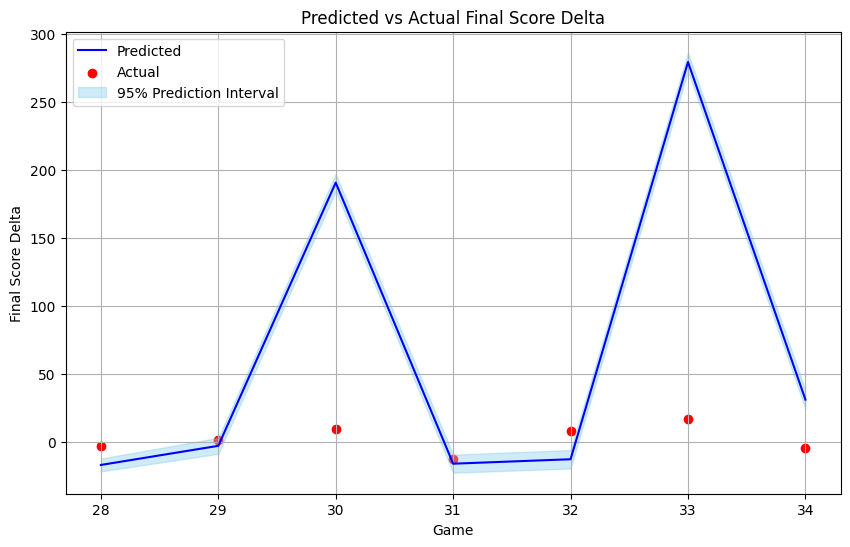

In [30]:

# Get the confidence intervals
confidence_intervals = predictions.conf_int()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, predicted_mean, label='Predicted', color='blue')
plt.scatter(test_y.index, test_y['Final_Score_Delta'], label='Actual', color='red', marker='o')

# Fill the prediction interval band
plt.fill_between(test_y.index, confidence_intervals['lower Final_Score_Delta'], confidence_intervals['upper Final_Score_Delta'], color='skyblue', alpha=0.4, label='95% Prediction Interval')


mse = mean_squared_error(test_y, predicted_mean)
print(f"Mean Squared Error: {mse}")

plt.xlabel('Game')
plt.ylabel('Final Score Delta')
plt.title('Predicted vs Actual Final Score Delta')
plt.legend()
plt.grid(True)
plt.show()

--------



---
## Drop interacting variables


In [31]:
# Drop the columns that have 'HomexTEAM' in their name from the test_X and train_X dataframes

columns_to_drop = [col for col in train_X.columns if 'HomexTEAM_' in col]
train_X = train_X.drop(columns=columns_to_drop)
test_X = test_X.drop(columns=columns_to_drop)

In [32]:
model = ARIMA(train_y, exog=train_X, order=(1, 0, 0))  # Adjust order if needed
results = model.fit()

forecast_steps = len(test_y)
predictions = results.get_forecast(steps=forecast_steps, exog=test_X)
predicted_mean = predictions.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Mean Squared Error: 289.57152839979506


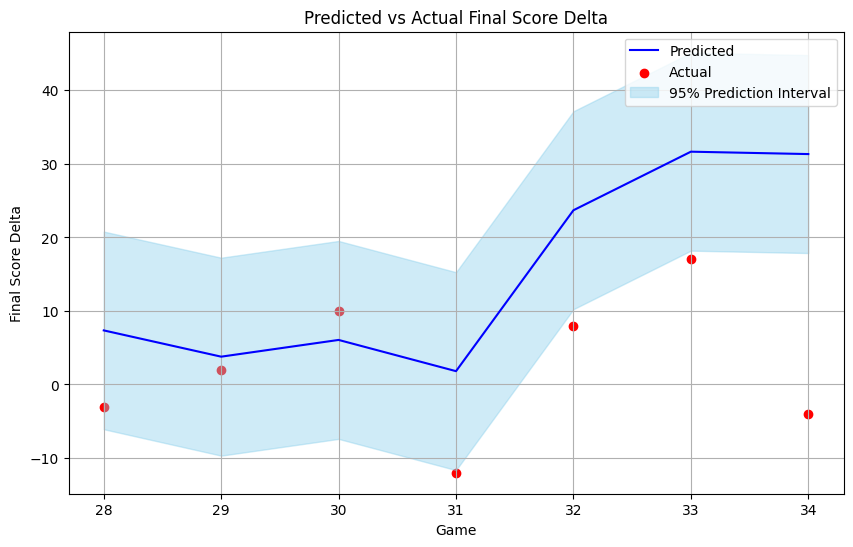

In [33]:

# Get the confidence intervals
confidence_intervals = predictions.conf_int()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, predicted_mean, label='Predicted', color='blue')
plt.scatter(test_y.index, test_y['Final_Score_Delta'], label='Actual', color='red', marker='o')

# Fill the prediction interval band
plt.fill_between(test_y.index, confidence_intervals['lower Final_Score_Delta'], confidence_intervals['upper Final_Score_Delta'], color='skyblue', alpha=0.4, label='95% Prediction Interval')


mse = mean_squared_error(test_y, predicted_mean)
print(f"Mean Squared Error: {mse}")

plt.xlabel('Game')
plt.ylabel('Final Score Delta')
plt.title('Predicted vs Actual Final Score Delta')
plt.legend()
plt.grid(True)